In [1]:
import pandas as pd
import re
import gensim 
import mglearn
import numpy as np
import os
import matplotlib.pyplot as plta
from konlpy.utils import pprint
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Kkma, Twitter
import pyLDAvis.gensim
import pyLDAvis.sklearn
import collections
from gensim.models.word2vec import Word2Vec
from gensim import corpora

import time
import datetime

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
# from konlpy.corpus import kolaw
# from konlpy.tag import Twitter; t = Twitter()
# from konlpy.tag import Okt; t = Okt()
#!pip install customized_konlpy
from ckonlpy.tag import Twitter; t = Twitter()
import ckonlpy

from konlpy.tag import Hannanum; h = Hannanum()
from konlpy.tag import Kkma; k = Kkma()
from konlpy.tag import Komoran; ko = Komoran()
# 윈도우 버전에서는 지원하지 않음
from konlpy.tag import Mecab; m = Mecab()

from collections import Counter

import pickle

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
from matplotlib import style

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# fname 옵션을 사용하는 방법
fontPath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontPath, size=18)

font_name = font_manager.FontProperties(fname=fontPath).get_name()
rc('font', family=font_name)
# style.use('ggplot')

from wordcloud import WordCloud

In [69]:
yearIAIA = range(2011, 2019)

def fileRead(files):
    tknzr = TweetTokenizer()
    textCorpus = []
    
    for file in files:
        print(file, '파일을 처리합니다.')
        corpus = open(file).read()
        tokens = tknzr.tokenize(removeStopwords_init(corpus))
        words = [w.lower() for w in tokens if len(w) > 1]
        print('                 불용어를 처리하고 있습니다.')
        tokens = removeStopwords(words)
            
        if len(tokens) != 0: 
            textCorpus.append(tokens)
#             print(len(textCorpus))
    
    return textCorpus

# stopwordsTextsIAIA = []

#     print('한글자 제거(+영문소문자 변환) :',len(tokens),'->',len(words))

    print('불용어 제거 :',len(words),'->',len(wordsExceptOf))
#     stopwordsTextsIAIA[intCountTokens]=wordsExceptOf
    stopwordsTextsIAIA.append(wordsExceptOf)
    intCountTokens+=1


def removeStopwords_init(contexts):
#     stop_words = ['위해 ', '위해서는', '대상으로', '대한 ', '통해', '경우', '나타']
#     stop_words = ['대한 ','나타','또한','까지','부터',]
    stop_words=[]
    
    for each_word in stop_words: contexts = contexts.replace(each_word, '')
    
    return contexts

def morpheme_t(contexts):
    t_nouns = t.nouns(contexts)
    t_tokens = [n for n in t_nouns if len(n) > 1]
    
    return t_tokens

def removeStopwords(tokens):
#     stop_words = ['연구','환경','평가','분석','결과','관리','영향','적용','지역','계획','이용','조사','방법','개발',
#                   '자료','사업','변화','나타','방안','기준','춘계학술대회','추계학술대회','환경영향평가',
#                   '한국환경영향평가학회']
    stop_words=['de','use','also','may','one','used','et','al','new','well','based','would','within','could','however','two']

    t_tokens=[w for w in tokens if w not in stopwords.words('english')]
    t_tokens=[w for w in t_tokens if w not in stop_words]
    print(len(tokens), "->", len(t_tokens))
    
    return t_tokens

userDics = ['한국환경정책평가연구원','한국환경정책.평가연구원', #기관명
            '환경정책','의무제','관리제','물관리','녹색성장',
            '민간환경감시단',
            '비점오염원','생물자원','강추위','혹한','혹서','이상저온',
            '이상고온','열섬','열파','이상기온',
            '집중강우','풍수해','황사비',
            '배출허용기준','해양배출업','배출량','배출업소','배출권','배출가스','오염취약지역','취약지역',
            '분리배출'
           ,'감축정책','감축대책', #온실가스
            '경우',
           ]

for userWord in userDics: t.add_dictionary(userWord,'Noun')
    
# [('나타', 'Noun'), ('났는데', 'Verb')]
# [('미세', 'Noun'), ('물리과정', 'Noun'), ('의', 'Josa')]
# t.add_dictionary(userWord,'Verb')

In [5]:
txtList = []
pathIAIA = './IAIA_Proceedings/'
yearIAIA = os.listdir(pathIAIA)
yearIAIA.sort()

for year in yearIAIA:
    if year[:2] == '20':
#         print(year)
        subDir = pathIAIA + year + '/Paper/'
   
        txtFileList = os.listdir(subDir)
        txtFileList.sort()
        for file in txtFileList:
            if (file.find('.txt') is not -1):
                txtFile = subDir + file
                txtList.append(txtFile)
            
txtList.sort()
txtList

['./IAIA_Proceedings/2011/Paper/113 Expectation on Railway Expansion in Hong Kong.txt',
 './IAIA_Proceedings/2011/Paper/Agriculture Environmental Assessment and Certification, Yukon, Canada.txt',
 './IAIA_Proceedings/2011/Paper/Application of Environmental Quality Objectives in Regional Scale Infrastructure Projects, a Swedish Example.txt',
 './IAIA_Proceedings/2011/Paper/Archaeological Predictive Models for ESIA Baseline.txt',
 './IAIA_Proceedings/2011/Paper/Assessing Support for Emissions Reduction Policy.txt',
 './IAIA_Proceedings/2011/Paper/Assessment Guidelines, Oil and Gas Exploration.txt',
 './IAIA_Proceedings/2011/Paper/Best Practices in Small Hydro Development.txt',
 './IAIA_Proceedings/2011/Paper/Between Legality and Legitimacy of Public Involvement in Environmental Decision Making.txt',
 './IAIA_Proceedings/2011/Paper/Biodiversity Offsets and ESIA Schedules.txt',
 './IAIA_Proceedings/2011/Paper/By_Spanish_road_compensatory_final.txt',
 './IAIA_Proceedings/2011/Paper/CSR, Glo

In [6]:
textsIAIA = []
startYear = ''

for file in txtList:
#     print(file.split('/')[2])
    currentYear=file.split('/')[2]
    if startYear != currentYear:
        startYear = currentYear
        print(startYear,'년을 시작합니다.')
        intPaperCountPerYear = 1

    if intPaperCountPerYear == 1:
        textsIAIA.append(removeStopwords_init(open(file).read()))
    else:
        textsIAIA[-1]+=removeStopwords_init(open(file).read())
    print(currentYear,'년도',str(intPaperCountPerYear).zfill(2),'번째 처리하였습니다.')    
    intPaperCountPerYear += 1
#     textsIAIA.append(removeStopwords_init(open(file).read()))
#     print(file, '을 읽었습니다. :', len(textsEnv[-1]))

2011 년을 시작합니다.
2011 년도 01 번째 처리하였습니다.
2011 년도 02 번째 처리하였습니다.
2011 년도 03 번째 처리하였습니다.
2011 년도 04 번째 처리하였습니다.
2011 년도 05 번째 처리하였습니다.
2011 년도 06 번째 처리하였습니다.
2011 년도 07 번째 처리하였습니다.
2011 년도 08 번째 처리하였습니다.
2011 년도 09 번째 처리하였습니다.
2011 년도 10 번째 처리하였습니다.
2011 년도 11 번째 처리하였습니다.
2011 년도 12 번째 처리하였습니다.
2011 년도 13 번째 처리하였습니다.
2011 년도 14 번째 처리하였습니다.
2011 년도 15 번째 처리하였습니다.
2011 년도 16 번째 처리하였습니다.
2011 년도 17 번째 처리하였습니다.
2011 년도 18 번째 처리하였습니다.
2011 년도 19 번째 처리하였습니다.
2011 년도 20 번째 처리하였습니다.
2011 년도 21 번째 처리하였습니다.
2011 년도 22 번째 처리하였습니다.
2011 년도 23 번째 처리하였습니다.
2011 년도 24 번째 처리하였습니다.
2011 년도 25 번째 처리하였습니다.
2011 년도 26 번째 처리하였습니다.
2011 년도 27 번째 처리하였습니다.
2011 년도 28 번째 처리하였습니다.
2011 년도 29 번째 처리하였습니다.
2011 년도 30 번째 처리하였습니다.
2011 년도 31 번째 처리하였습니다.
2011 년도 32 번째 처리하였습니다.
2011 년도 33 번째 처리하였습니다.
2011 년도 34 번째 처리하였습니다.
2011 년도 35 번째 처리하였습니다.
2011 년도 36 번째 처리하였습니다.
2011 년도 37 번째 처리하였습니다.
2011 년도 38 번째 처리하였습니다.
2011 년도 39 번째 처리하였습니다.
2011 년도 40 번째 처리하였습니다.
2011 년도 41 번째 처리하였습니다.
2011 년도 42 번째 처리하였습니다.
2011 년도 43 번째 처리하였습

2015 년도 70 번째 처리하였습니다.
2015 년도 71 번째 처리하였습니다.
2015 년도 72 번째 처리하였습니다.
2015 년도 73 번째 처리하였습니다.
2015 년도 74 번째 처리하였습니다.
2015 년도 75 번째 처리하였습니다.
2015 년도 76 번째 처리하였습니다.
2015 년도 77 번째 처리하였습니다.
2015 년도 78 번째 처리하였습니다.
2015 년도 79 번째 처리하였습니다.
2015 년도 80 번째 처리하였습니다.
2015 년도 81 번째 처리하였습니다.
2015 년도 82 번째 처리하였습니다.
2015 년도 83 번째 처리하였습니다.
2015 년도 84 번째 처리하였습니다.
2015 년도 85 번째 처리하였습니다.
2015 년도 86 번째 처리하였습니다.
2015 년도 87 번째 처리하였습니다.
2015 년도 88 번째 처리하였습니다.
2015 년도 89 번째 처리하였습니다.
2015 년도 90 번째 처리하였습니다.
2015 년도 91 번째 처리하였습니다.
2015 년도 92 번째 처리하였습니다.
2015 년도 93 번째 처리하였습니다.
2015 년도 94 번째 처리하였습니다.
2015 년도 95 번째 처리하였습니다.
2015 년도 96 번째 처리하였습니다.
2015 년도 97 번째 처리하였습니다.
2015 년도 98 번째 처리하였습니다.
2015 년도 99 번째 처리하였습니다.
2015 년도 100 번째 처리하였습니다.
2015 년도 101 번째 처리하였습니다.
2015 년도 102 번째 처리하였습니다.
2015 년도 103 번째 처리하였습니다.
2015 년도 104 번째 처리하였습니다.
2015 년도 105 번째 처리하였습니다.
2015 년도 106 번째 처리하였습니다.
2015 년도 107 번째 처리하였습니다.
2015 년도 108 번째 처리하였습니다.
2015 년도 109 번째 처리하였습니다.
2015 년도 110 번째 처리하였습니다.
2015 년도 111 번째 처리하였습니다.
2015 년도 112 번째 처리하였습니다

In [7]:
len(textsIAIA[0])

1873693

In [8]:
# 전체 코퍼스 만들기
textsIAIA_All = ''
for text in textsIAIA:
    print(len(text))
    textsIAIA_All+=text

print(len(textsIAIA_All))

1873693
2506838
2369751
1101643
2284215
1407892
1405610
1080265
14029907


In [35]:
# for text in textsIAIA:
#     print(len(text))

1873693
2369751
1101643
2284215
1407892
1405610
1080265


In [15]:
yearIAIA[0]

2011

In [16]:
stopwordsTextsIAIA = []
tknzr = TweetTokenizer()
stop_words=['de','use','also','may','one','used','et','al','new','well','based','would','within','could','however','two']
intCountTokens =0

for text in textsIAIA:
    print(yearIAIA[intCountTokens],"년 진행합니다.",len(text))
    tokens = tknzr.tokenize(text)
    words = [w.lower() for w in tokens if len(w) > 1]
    print('한글자 제거(+영문소문자 변환) :',len(tokens),'->',len(words))
    wordsExceptOf=[w for w in words if not w in stopwords.words('english')]
    wordsExceptOf=[w for w in wordsExceptOf if not w in stop_words]
    print('불용어 제거 :',len(words),'->',len(wordsExceptOf))
#     stopwordsTextsIAIA[intCountTokens]=wordsExceptOf
    stopwordsTextsIAIA.append(wordsExceptOf)
    intCountTokens+=1
# 216981 -> 163782
# 278802 -> 210066
# 131120 -> 97713
# 284920 -> 206454
# 171750 -> 127813
# 175106 -> 129293
# 134534 -> 98198

# 한글자 제거(+영문소문자) : 163782 -> 163782
# 불용어 제거 : 163782 -> 158329
# 한글자 제거(+영문소문자) : 210066 -> 210066
# 불용어 제거 : 210066 -> 202767
# 한글자 제거(+영문소문자) : 97713 -> 97713
# 불용어 제거 : 97713 -> 94386
# 한글자 제거(+영문소문자) : 206454 -> 206454
# 불용어 제거 : 206454 -> 199535
# 한글자 제거(+영문소문자) : 127813 -> 127813
# 불용어 제거 : 127813 -> 123448
# 한글자 제거(+영문소문자) : 129293 -> 129293
# 불용어 제거 : 129293 -> 125044
# 한글자 제거(+영문소문자) : 98198 -> 98198
# 불용어 제거 : 98198 -> 94967
    
# for text in textsIAIA:
#     print(len(text))
#     tokens = tknzr.tokenize(text)
#     words = [w for w in tokens if not w in stopwords.words('english')]
#     stopwordsTextsIAIA.append(words)

2011 년 진행합니다. 1873693
한글자 제거(+영문소문자 변환) : 305214 -> 247336
불용어 제거 : 247336 -> 153421
2012 년 진행합니다. 2506838
한글자 제거(+영문소문자 변환) : 417696 -> 332318
불용어 제거 : 332318 -> 212363
2013 년 진행합니다. 2369751
한글자 제거(+영문소문자 변환) : 387542 -> 313117
불용어 제거 : 313117 -> 197281
2014 년 진행합니다. 1101643
한글자 제거(+영문소문자 변환) : 181091 -> 145151
불용어 제거 : 145151 -> 91912
2015 년 진행합니다. 2284215
한글자 제거(+영문소문자 변환) : 387206 -> 303682
불용어 제거 : 303682 -> 193781
2016 년 진행합니다. 1407892
한글자 제거(+영문소문자 변환) : 235170 -> 188115
불용어 제거 : 188115 -> 120095
2017 년 진행합니다. 1405610
한글자 제거(+영문소문자 변환) : 237617 -> 188254
불용어 제거 : 188254 -> 121820
2018 년 진행합니다. 1080265
한글자 제거(+영문소문자 변환) : 182794 -> 144084
불용어 제거 : 144084 -> 92340


In [17]:
Counter(stopwordsTextsIAIA[0]).most_common(100)

[('environmental', 2058),
 ('assessment', 1605),
 ('project', 1134),
 ('impact', 1119),
 ('development', 961),
 ('eia', 818),
 ('sea', 818),
 ('public', 710),
 ('process', 658),
 ('projects', 624),
 ('social', 571),
 ('impacts', 526),
 ('biodiversity', 415),
 ('information', 407),
 ('planning', 404),
 ('management', 402),
 ('local', 401),
 ('water', 390),
 ('environment', 379),
 ('2010', 377),
 ('area', 367),
 ('issues', 361),
 ('review', 354),
 ('data', 351),
 ('land', 350),
 ('areas', 329),
 ('international', 319),
 ('case', 312),
 ('economic', 311),
 ('community', 308),
 ('government', 305),
 ('analysis', 296),
 ('2011', 294),
 ('health', 291),
 ('level', 286),
 ('different', 284),
 ('2009', 270),
 ('construction', 267),
 ('sustainability', 264),
 ('national', 263),
 ('change', 263),
 ('measures', 262),
 ('participation', 262),
 ('effects', 261),
 ('potential', 259),
 ('strategic', 256),
 ('urban', 256),
 ('study', 255),
 ('plans', 255),
 ('2007', 255),
 ('activities', 252),
 ('qual

8


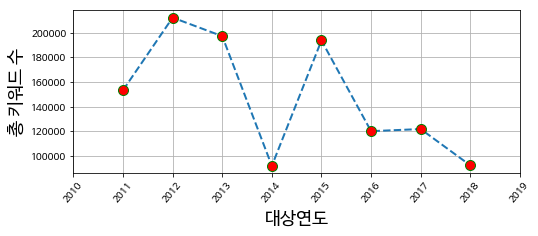

In [21]:
    values = []
    for token in stopwordsTextsIAIA: values.append(len(token))
    
    print(len(values))
    plt.plot(range(2011,2019), values, label='키워드 수', lw=2, ls="--", marker="o", ms=10, mew=1, mfc="r", mec="g")
#         포인트 안에 색(mfc)
#         포인트 테두리 색(mec)
    
#     plt.rcParams['figure.figsize'] = (14,14)
#     print(len(yearEnvWhitep))
    plt.xticks(rotation = 50)
    plt.rcParams['figure.figsize'] = (8,3)
#     print(yearEnvWhitep)
    plt.xlim(2010, 2019)
#     plt.ylim(0, 6000)
#     plt.legend(loc='upper left')
#     plt.title('환경백서 전체 텍스트 년도별 키워드수', fontproperties=fontprop)
    plt.ylabel('총 키워드 수', fontproperties=fontprop)
    plt.xlabel('대상연도', fontproperties=fontprop)
    plt.grid(True)

    plt.savefig('./05_키워드트렌드/IAIA_연도별_키워드수 변화_' + str(datetime.datetime.now().strftime('%Y%m%d_%H%M_')) + '_트렌드.png', dpi=200)

In [22]:
countsIAIA=[]
for tokens in stopwordsTextsIAIA:
    countsIAIA.append(Counter(tokens).most_common())
print('완료되었습니다.')

완료되었습니다.


In [27]:
# 키워드 순위 0:20, 20:40, 40:60
intKeywordsRankingStart=40
intKeywordsRankingEnd=60

countsIAIAperYear = []
listTop50IAIA = pd.DataFrame()
intCountYear = 0

for counts in countsIAIA:
    if len(listTop50IAIA)==0:
        listTop50IAIA=pd.DataFrame(counts[intKeywordsRankingStart:intKeywordsRankingEnd],
                                    columns=[str(yearIAIA[intCountYear])+'년','키워드수'])
    else:
        listTop50IAIA=pd.concat([listTop50IAIA,pd.DataFrame(counts[intKeywordsRankingStart:intKeywordsRankingEnd],
                                                              columns=[str(yearIAIA[intCountYear])+'년','키워드수'])]
                                 ,axis=1)
    intCountYear+=1

listTop50IAIA.index=range(intKeywordsRankingStart+1,intKeywordsRankingEnd+1)
listTop50IAIA

,2011년,키워드수,2012년,키워드수,2013년,키워드수,2014년,키워드수,2015년,키워드수,2016년,키워드수,2017년,키워드수,2018년,키워드수
41,change,263,potential,369,areas,337,state,157,potential,328,information,229,2013,214,policy,168
42,measures,262,resources,368,risk,327,climate,157,research,320,issues,224,state,209,research,165
43,participation,262,climate,364,plan,321,monitoring,155,plan,319,system,221,analysis,206,issues,164
44,effects,261,2007,361,paper,320,law,155,results,317,participation,219,system,205,durban,158
45,potential,259,monitoring,360,community,319,strategic,154,approach,313,monitoring,214,policy,203,case,157
46,strategic,256,effects,356,framework,314,2011,153,issues,311,2012,213,2017,201,review,156
47,urban,256,national,355,system,312,conference,152,level,310,regional,213,measures,199,conference,151
48,study,255,portugal,354,analysis,310,cultural,151,sustainable,308,2011,212,monitoring,198,2015,150
49,plans,255,information,349,data,308,plans,149,natural,308,sustainability,209,sea,196,national,147
50,2007,255,table,347,mitigation,307,change,149,government,304,research,203,areas,193,alternatives,141


In [31]:
def keywordsTrend(tokens, keywords):
    plt.rcParams['figure.figsize'] = (14,4)
    labels = []

#     print(len(keywords))
    if len(keywords) == 0:
        print("알고 싶은 키워드를 입력하십시오.")
        return
    
    for keyword in keywords:
        values = []
        labels.append(keyword)
#         print(keyword, len(tokens))
        for token in tokens:
#             print(len(token))
            try:
                values.append(dict(Counter(token))[keyword])
            except:
                values.append(0)
        
#         print(len(tokens))
        plt.plot(yearIAIA, values, label=keyword, lw=2, ls="--", marker="o", ms=7, mew=1)#, mfc="r", mec="g")
#         포인트 안에 색(mfc)
#         포인트 테두리 색(mec)
    
#     plt.rcParams['figure.figsize'] = (14,14)
#     plt.xticks(rotation=50)
    plt.rcParams['figure.figsize'] = (10,3)
    plt.legend(loc='upper left')
#     plt.title('전체 텍스트 분석결과', fontproperties=fontprop)
    plt.ylabel('총 키워드 수', fontproperties=fontprop)
    plt.xlabel('대상연도', fontproperties=fontprop)
    plt.xlim(2010,2019)

    plt.savefig('./05_키워드트렌드/IAIA_연도별_' + str(datetime.datetime.now().strftime('%Y%m%d_%H%M_')) + 
                keyword + '_트렌드.png', dpi=200)

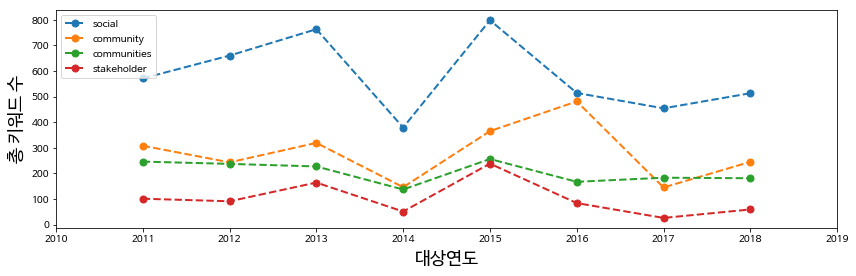

In [35]:
keywordsTrend(stopwordsTextsIAIA,['social','community','communities','stakeholder'])

In [38]:
def keywordsTrendBarStacked(tokens, keywords):
    plt.rcParams['figure.figsize'] = (14,4)
    labels = []
    bottomValues = []
    preBottomValues = []
    intCheckBottomCount = 10
    
    if len(bottomValues) == 0:
        for i in range(0, len(tokens)):
            bottomValues.append(0) 
            preBottomValues.append(0)
#     print(bottomValues)
#     preBottomValues = bottomValues

#     print(len(keywords))
    if len(keywords) == 0:
        print("알고 싶은 키워드를 입력하십시오.")
        return
    
    for keyword in keywords:
        values = []
        intValueCount = 0
        labels.append(keyword)
#         print(keyword, len(tokens))
#         print(preBottomValues)
        for token in tokens:
#             print(len(token))
            try:
                bottomValue = dict(Counter(token))[keyword]
#                 if intCheckBottomCount != 0:
#                     print(bottomValue)
#                     : values[intValueCount] = bottomValue
                values.append(bottomValue)
                preBottomValues[intValueCount] = bottomValues[intValueCount]
                bottomValues[intValueCount] +=  bottomValue
            except:
                values.append(0)
            
            intValueCount += 1
#         print(len(tokens))
#         plt.plot(yearEnvWhitep, values, label=keyword, lw=2, ls="--", marker="o", ms=7, mew=1)#, mfc="r", mec="g")
        
#         print(preBottomValues)
        if intCheckBottomCount == 0:
            plt.bar(yearIAIA, values, bottom=None, label=keyword)
        else:
            plt.bar(yearIAIA, values, bottom=preBottomValues, label=keyword)

#         포인트 안에 색(mfc)
#         포인트 테두리 색(mec)
#         preBottomValues = bottomValues

        intCheckBottomCount += 1
    
#     plt.rcParams['figure.figsize'] = (14,14)
    plt.xticks(rotation=50)
    plt.rcParams['figure.figsize'] = (12,3)
    plt.legend(loc='upper left', )
#     plt.title('기후변화 텍스트 분석결과', fontproperties=fontprop)
    plt.ylabel('총 키워드 수', fontproperties=fontprop)
    plt.xlabel('대상연도', fontproperties=fontprop)
#     plt.ylim(0,10000)
#     plt.yscale

    plt.xlim(2010,2019)

    plt.savefig('./05_키워드트렌드/IAIA_연도별(바스택)_' + str(datetime.datetime.now().strftime('%Y%m%d_%H%M_')) + 
                keyword + '_트렌드.png', dpi=200)

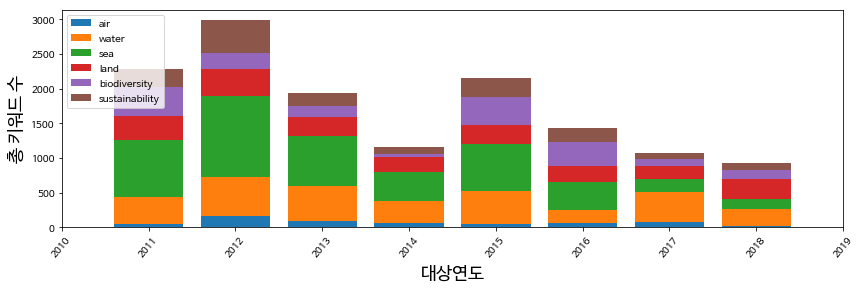

In [58]:
keywordsTrendBarStacked(stopwordsTextsIAIA,['air','water','sea','land','biodiversity','sustainability'])

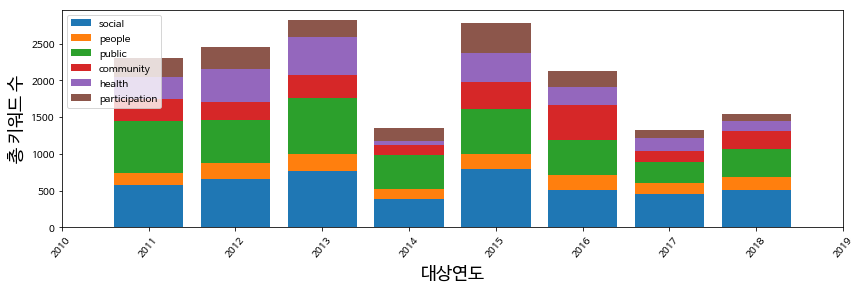

In [61]:
keywordsTrendBarStacked(stopwordsTextsIAIA,['social','people','public','community','health','participation'])

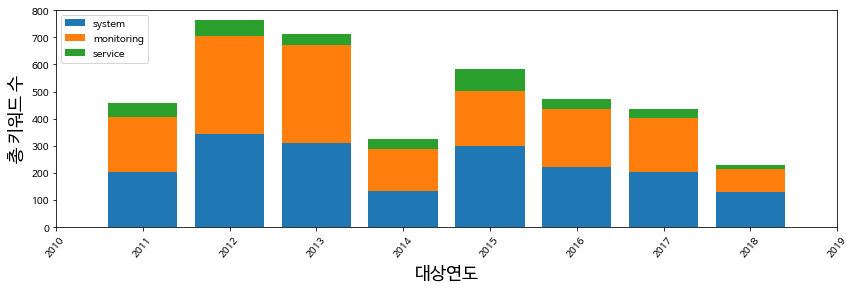

In [67]:
keywordsTrendBarStacked(stopwordsTextsIAIA,['system','monitoring','service'])

In [70]:
corpusIAIA = fileRead(txtList)

dictIAIA = corpora.Dictionary(corpusIAIA)
newIAIA = [dictIAIA.doc2bow(text) for text in corpusIAIA]

./IAIA_Proceedings/2011/Paper/113 Expectation on Railway Expansion in Hong Kong.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2331 -> 1472
./IAIA_Proceedings/2011/Paper/Agriculture Environmental Assessment and Certification, Yukon, Canada.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1967 -> 1161
./IAIA_Proceedings/2011/Paper/Application of Environmental Quality Objectives in Regional Scale Infrastructure Projects, a Swedish Example.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2013 -> 1253
./IAIA_Proceedings/2011/Paper/Archaeological Predictive Models for ESIA Baseline.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2119 -> 1316
./IAIA_Proceedings/2011/Paper/Assessing Support for Emissions Reduction Policy.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2195 -> 1375
./IAIA_Proceedings/2011/Paper/Assessment Guidelines, Oil and Gas Exploration.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1807 -> 1036
./IAIA_Proceedings/2011/Paper/Best Practices in Small Hydro Development.txt 파일

2730 -> 1683
./IAIA_Proceedings/2011/Paper/Modernizing and Strengthening Aboriginal Participation in Environmental Assessment and Review.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3013 -> 1747
./IAIA_Proceedings/2011/Paper/Natural Systems Changes through GIS and Environmental Impact Assessment.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1760 -> 1193
./IAIA_Proceedings/2011/Paper/Non-Compliance in Projects Subjected to an Environmental Impact Assessment.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1937 -> 1296
./IAIA_Proceedings/2011/Paper/Novel Approaches to Community and Government Stakeholder Consultation and Participatory Data Collection for Health Impact Assessments.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3369 -> 2168
./IAIA_Proceedings/2011/Paper/Oil and Gas and the Environment in Trinidad and Tobago.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1995 -> 1158
./IAIA_Proceedings/2011/Paper/One Step Forward and Two Steps Back.txt 파일을 처리합니다.
                 불용어를

2607 -> 1769
./IAIA_Proceedings/2012/Paper/Azechi, Keita.  EIA as a Conflict Mitigation Tool for Wind Farm Projects in Japan.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3197 -> 2113
./IAIA_Proceedings/2012/Paper/Barnes, Jeffrey.  Long-Term Planning of Energy Corridors in Absence of SEA.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2119 -> 1331
./IAIA_Proceedings/2012/Paper/Bergamini, Kay.  Diagnosis of Landscape Assessment in the Chilean EIA.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1532 -> 887
./IAIA_Proceedings/2012/Paper/Bergamini, Kay.  EIA for Transmission Lines in Chile.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1991 -> 1284
./IAIA_Proceedings/2012/Paper/Bergmu%cc%88ller, Ralph.  Reputation based cooperation in the ESIA process.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2468 -> 1587
./IAIA_Proceedings/2012/Paper/Bernardino, Joana.  Bird and bat mortality at Portuguese wind farms.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1380 -> 868
./IAIA_Proceedings/2

1929 -> 1258
./IAIA_Proceedings/2012/Paper/Kawazoe, Yasuhiro.  A Study on the Effects of Operating JICA Advisory Committee for Environmental and Social Considerations.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2219 -> 1402
./IAIA_Proceedings/2012/Paper/Kim, Jin-Oh.  A Study on Facilitating Factors and Barriers to Addressing Cumulative Effects.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3097 -> 1965
./IAIA_Proceedings/2012/Paper/Kregar, Ales.  Expected and actual impacts of infrastructure.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2267 -> 1363
./IAIA_Proceedings/2012/Paper/LaPierre, Louis.  Development of a Consensus Model to address Traditional Environmental Knowledge Process.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1231 -> 754
./IAIA_Proceedings/2012/Paper/Laborinho, Marta.  Social and environmental benefits of the Lisbon Metro system.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2298 -> 1550
./IAIA_Proceedings/2012/Paper/Lam, Josh.  Eco-planning of Integrated W

1463 -> 905
./IAIA_Proceedings/2012/Paper/Reis, Susana.  BATS ADAPTING TO HUMAN-MADE STRUCTURES - THE CASE OF THE %e2%80%9cCONCESSA%cc%83O TRANSMONTANA%e2%80%9d.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2021 -> 1314
./IAIA_Proceedings/2012/Paper/Rickson, Kara.  Social impact assessment and the coal seam gas controversy in Queensland, Australia.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2524 -> 1656
./IAIA_Proceedings/2012/Paper/Rickson, Roy.  Global Mining and Local Community Relations.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2418 -> 1551
./IAIA_Proceedings/2012/Paper/Rodrigues, Joa%cc%83o.  Monitoring of energy facilities in Portugal 2009 - 2001.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2497 -> 1577
./IAIA_Proceedings/2012/Paper/Rufino, Rui.  COMPENSATION MEASURES AT AMARELEJA SOLAR POWER STATION.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1943 -> 1129
./IAIA_Proceedings/2012/Paper/Rushton, Risha.  The efficacy of EA for sustainable forest management.txt 파일

2463 -> 1445
./IAIA_Proceedings/2013/Paper/Climate proofing development cooperation through impact assessment - a policy arrangement perspective .txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2290 -> 1504
./IAIA_Proceedings/2013/Paper/Completing Mitigation at U.S. Customs Land Ports of Entry.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2770 -> 1758
./IAIA_Proceedings/2013/Paper/Confidence, Uncertainty, and Risk in Environmental Assessment.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2389 -> 1465
./IAIA_Proceedings/2013/Paper/Construction and Future Development of the Environmental Impact Assessment Forum in CHINA.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1981 -> 1252
./IAIA_Proceedings/2013/Paper/Coordination Mechanisms for Environmental Impact Assessment in Pakistan.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2783 -> 1670
./IAIA_Proceedings/2013/Paper/Critical Habitat Assessment using IFC PS6 Criteria.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2321 -> 1521
./IAI

2404 -> 1748
./IAIA_Proceedings/2013/Paper/Linking EIA to CIAM.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2249 -> 1253
./IAIA_Proceedings/2013/Paper/MITIGATION HIERARCHY FOR BIODIVERSITY CONSERVATION .txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2157 -> 1370
./IAIA_Proceedings/2013/Paper/Mega-events in the city of Rio de Janeiro - the possible contributions of SEA for mainstreaming environmental and social issues in decision making.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1645 -> 982
./IAIA_Proceedings/2013/Paper/Monitoring cultural significance and impact assessments.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2744 -> 1759
./IAIA_Proceedings/2013/Paper/Multiple EIAs and Follow-up Management .txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2681 -> 1744
./IAIA_Proceedings/2013/Paper/One Country, Two EIA Systems - the public engagement in the EIA systems of Hong Kong and China.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2360 -> 1490
./IAIA_Proceedings/2013/Paper/PA

2384 -> 1489
./IAIA_Proceedings/2013/Paper/Was There an Impact.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2539 -> 1514
./IAIA_Proceedings/2013/Paper/What is needed for the design of adaptive policy appraisal.docx.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3002 -> 1697
./IAIA_Proceedings/2013/Paper/What is needed for the design of adaptive policy appraisal.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3002 -> 1697
./IAIA_Proceedings/2013/Paper/Working Around the Challenges - Climate Risk Impact Assessment in Central Asia.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2102 -> 1397
./IAIA_Proceedings/2014/Paper/Acerbi, Marcelo.  EIA systems in Latin America and the Caribbean.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
4812 -> 3049
./IAIA_Proceedings/2014/Paper/Athie, Mauricio.  The first EIR on art work.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2417 -> 1450
./IAIA_Proceedings/2014/Paper/Baldwin, Gunnar.  The role of international standard-setting bodies.txt 파일을 처리합니

1961 -> 1209
./IAIA_Proceedings/2014/Paper/Santos, Mariana.  Contributions to land use planning of rural areas.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2797 -> 1647
./IAIA_Proceedings/2014/Paper/Sepulveda, Andrea.  Indigenous methodological approach.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1971 -> 1101
./IAIA_Proceedings/2014/Paper/Skei, Jens.  Methodologies for EIA of deep sea tailings disposal projects.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1979 -> 1194
./IAIA_Proceedings/2014/Paper/Thefuturesnotwhatitusedtobe.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2387 -> 1372
./IAIA_Proceedings/2014/Paper/Tsang, Terence.  EIA ordinance, a useful tool to shape our future.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2475 -> 1491
./IAIA_Proceedings/2014/Paper/Vogt, Craig.  International assessment of marine and riverine disposal of mine tailings.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2194 -> 1394
./IAIA_Proceedings/2014/Paper/Walker, Patricio.  The Chilean a

2306 -> 1506
./IAIA_Proceedings/2015/Paper/Duarte, Carla - Impact significance in sugarcane industry EIA.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2207 -> 1316
./IAIA_Proceedings/2015/Paper/Duarte, Carla - Sustainability Content in Brazilian Ethanol Planning.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2299 -> 1515
./IAIA_Proceedings/2015/Paper/Effendi, Hefni - Moringa oleifera as coagulant for batik effluent treatment.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2656 -> 1909
./IAIA_Proceedings/2015/Paper/El-Fadel, Mutasem - Assessment of wastewater investment plans using DSS.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2298 -> 1556
./IAIA_Proceedings/2015/Paper/El-Fadel, Mutasem - Vulnerability indices for SWI assessment.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2068 -> 1446
./IAIA_Proceedings/2015/Paper/Enserink, Bert - Public Participation in China - Weaknesses, Strengths and Lessons Learned.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2125 -> 1322
./IAIA_Pro

3381 -> 2149
./IAIA_Proceedings/2015/Paper/Mitchell_Coupling SIA and CSR_26May15_1.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3383 -> 2151
./IAIA_Proceedings/2015/Paper/Montes Bastos, Marina - SEA in Brazil, legal-institutional challenges.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2081 -> 1164
./IAIA_Proceedings/2015/Paper/Mugadza, Amanda T. - Human rights impact assessments for sustainable tourism in southern Africa%e2%80%99s transfrontier conservation areas.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1934 -> 1159
./IAIA_Proceedings/2015/Paper/Muhammad Alizar, Aldi - Social Risks Mitigation and Stakeholder Engagement Plan.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2545 -> 1405
./IAIA_Proceedings/2015/Paper/Neimane, Leila - Concept of Reverse Environmental Impact Assessment.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
3388 -> 2107
./IAIA_Proceedings/2015/Paper/Nunes, Deolinda - The effectiveness of the Umbrella Strategic Environmental and Social Assessment (SESA) 

2693 -> 1663
./IAIA_Proceedings/2016/Paper/Aizawa, Hirofumi - EIA Technical Guidance on Radioactive Materials.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1950 -> 1306
./IAIA_Proceedings/2016/Paper/Albayrak, Ali - Public Behavior for Public Participation in EIA Process, Turkey.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2176 -> 1448
./IAIA_Proceedings/2016/Paper/Albayrak, Ali - Required Actions for EIA Regulation in Turkey.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1970 -> 1300
./IAIA_Proceedings/2016/Paper/Barasa, Philip - SEA for Energy Sector, Kenya.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2226 -> 1521
./IAIA_Proceedings/2016/Paper/Baresi, Umberto - SEA Integration in Sustainable Planning Frameworks.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2432 -> 1634
./IAIA_Proceedings/2016/Paper/Benjatanawat, Suvapak - Community Participation in Community HIA.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2771 -> 1817
./IAIA_Proceedings/2016/Paper/Brown, Glenn - Adding 

1964 -> 1247
./IAIA_Proceedings/2016/Paper/Shiraki, Hiroto - Effect on Energy Saving Campaign in Fukushima.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2124 -> 1297
./IAIA_Proceedings/2016/Paper/Spranger, Michael - The Role of the Cultural Arts in Post-Disaster Recovery.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2417 -> 1576
./IAIA_Proceedings/2016/Paper/Swangjang, Kanokporn - Ecological Impact Assessment .txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2449 -> 1632
./IAIA_Proceedings/2016/Paper/Takahashi, Wakana - Nuclear Evacuees in Fukushima Prefecture's Neighbouring Prefectures.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2136 -> 1359
./IAIA_Proceedings/2016/Paper/Takeuchi, Ayano - The Status of Offshore Wind Project in Japan.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1933 -> 1242
./IAIA_Proceedings/2016/Paper/Taylor, Nicholas - SIA for Community Resilience, New Zealand.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2597 -> 1688
./IAIA_Proceedings/2016/Paper/Toi, A

2169 -> 1382
./IAIA_Proceedings/2017/Paper/Hayashi, Kiichiro - Assessment of Forest Ecosystem Services.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2357 -> 1630
./IAIA_Proceedings/2017/Paper/Herring, Peter - A Place%e2%80%99s Past Guides a Healthier Future.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2321 -> 1386
./IAIA_Proceedings/2017/Paper/Hickey, Earle - Scoping of IA in Canada.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2332 -> 1449
./IAIA_Proceedings/2017/Paper/Hong, Sang-Pyo - Implication Measures between SDG and Korean EIA.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1412 -> 979
./IAIA_Proceedings/2017/Paper/Hori, Ayumi - Landscape conflicts on PV projects in Japan.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2216 -> 1481
./IAIA_Proceedings/2017/Paper/Horvath, Celesa - Focusing on Receptors.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2118 -> 1202
./IAIA_Proceedings/2017/Paper/Hubert, Chuck - A Case Study, Mitigate Impacts to Caribou from Diamond Mining in Ca

2366 -> 1653
./IAIA_Proceedings/2017/Paper/Welstead, Jean - Re-examining knowledge production in EIA.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2462 -> 1525
./IAIA_Proceedings/2017/Paper/Williams, Galina - Comparison of social costs of underground and open-ca....txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2494 -> 1705
./IAIA_Proceedings/2017/Paper/Williams, Galina - Comparison of social costs of underground and open-cast coal mining.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2485 -> 1700
./IAIA_Proceedings/2017/Paper/Witt, Katherine - Cumulative Effects Assessment is not so SIMPle.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2469 -> 1558
./IAIA_Proceedings/2017/Paper/Yamazaki, Gordon - Modifying the Project EIA Framework, Dam Removal.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2208 -> 1346
./IAIA_Proceedings/2017/Paper/Yanagi, Kenichiro - The Need for Strategic Environmental Assessment, Japan.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2381 -> 1570
./IAIA_Proce

2546 -> 1722
./IAIA_Proceedings/2018/Paper/Ogwang, Tom - The impacts of trans border projects.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2499 -> 1549
./IAIA_Proceedings/2018/Paper/Ojile, Meshach - Ecosystem services and impacts of industrial activities.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2532 -> 1683
./IAIA_Proceedings/2018/Paper/Olorundami, Fayokemi - Attitude towards Compensating for Environmental Injustice from Oil Exploitation.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2731 -> 1597
./IAIA_Proceedings/2018/Paper/Owen, Daniel - Managing Social Impacts of Labour Influx.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2257 -> 1470
./IAIA_Proceedings/2018/Paper/Pan, Peng - Information Management on the EIA Approval Process.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
1808 -> 1238
./IAIA_Proceedings/2018/Paper/Patiri, Victor - Adaptive Dredging and Sea Turtle Conservation.txt 파일을 처리합니다.
                 불용어를 처리하고 있습니다.
2278 -> 1521
./IAIA_Proceedings/2018/Paper/Re

In [ ]:
for topicsNo in range(6, 21):
    ldaIAIA = gensim.models.ldamodel.LdaModel(newIAIA, num_topics = topicsNo, id2word=dictIAIA, passes=15)
    lda_displayIAIA = pyLDAvis.gensim.prepare(ldaIAIA, newIAIA, dictIAIA, sort_topics=False)
    pyLDAvis.display(lda_displayIAIA)
    pyLDAvis.save_html(lda_displayIAIA, './10_LDA-분석결과/IAIA_전체 텍스트_' + str(datetime.datetime.now().strftime("%Y%m%d_%H%M_")) + str(topicsNo).zfill(2) + ".html")